# Directed message passing neural network (D-MPNN) for predicting power conversion efficiency (PCE) of organic solar cells (OSCs)

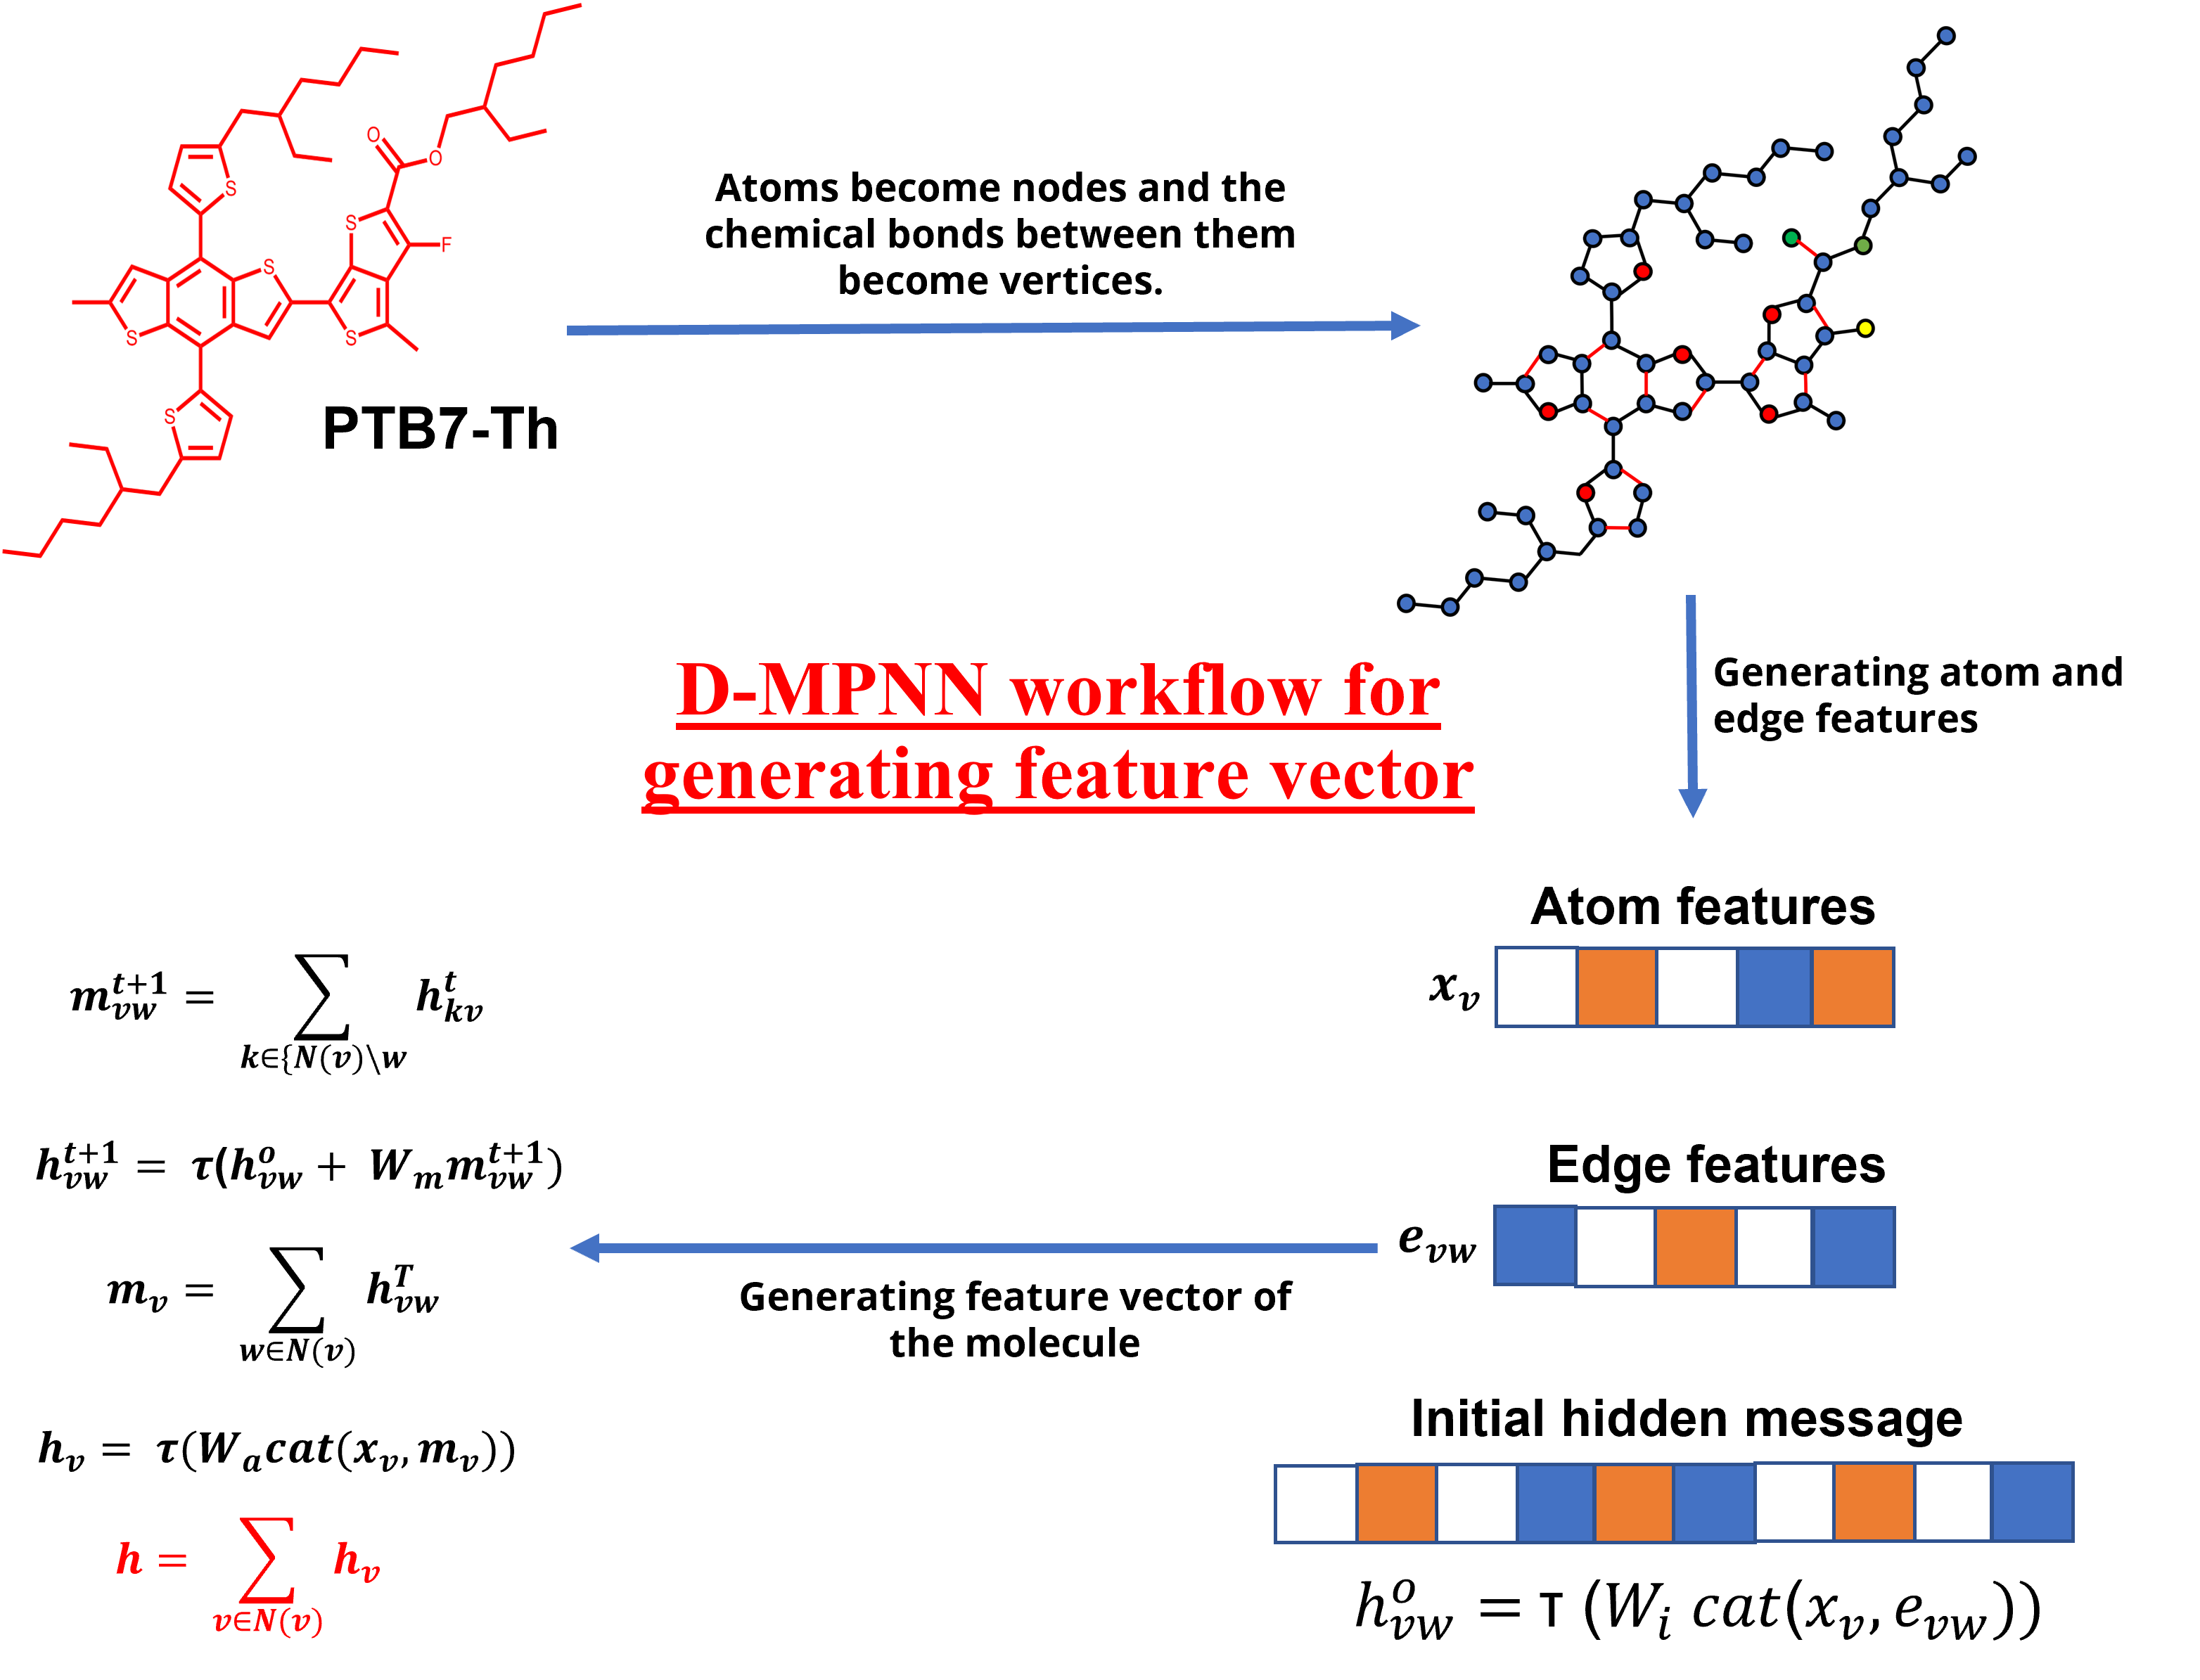

In [1]:
!nvidia-smi

Sat Feb 18 14:21:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.40       Driver Version: 516.40       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P8     3W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="8"

In [3]:
# !nvidia-smi

In [4]:
# !wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
# !chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
# !bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
# !conda install -q -y -c conda-forge rdkit==2020.09.2
# !conda install -q -y -c conda-forge chemprop
# # !git clone https://github.com/learningmatter-mit/uvvisml

# import os
# import sys
# import pandas as pd
# sys.path.append('/usr/local/lib/python3.7/site-packages/')
# import chemprop

# # os.chdir('uvvisml/uvvisml')

# # !bash get_model_files.sh

# Importing libraries

In [5]:
import os
import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr
import numpy as np

C:\Users\prate\anaconda3\envs\chemprop\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Hyperparameter optimization

### Best hyperparameters are saved in config.json file

In [6]:
arguments = [
#     '--data_path', 'huang_data.csv',
    '--data_path', '1318 OSC dataset.csv',
    '--dataset_type', 'regression',
    '--number_of_molecules', '2',
    '--num_iters', '30',
    '--config_save_path', 'config.json',
#     '--seed', '2',
    '--hyperopt_checkpoint_dir', 'chemprop model hyperparameter',
    '--log_dir', 'chemprop model hyperparameter log',
    '--gpu', '5',

    
#     '--epoch', '60',
]

args = chemprop.args.HyperoptArgs().parse_args(arguments)
chemprop.hyperparameter_optimization.hyperopt(args=args)

# Training

### Best hyperparameters are used for training using config.json file

In [7]:
arguments = [
#     '--data_path', 'huang_data.csv',
    '--data_path', '1318 OSC dataset.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reg',
    '--epochs', '30',
    '--number_of_molecules', '2',
    '--save_smiles_splits',
#     '--depth', '6',
#     '--dropout', '0.0',
#     '--ffn_num_layers', '3',
#     '--hidden_size', '1700',
    # '--features_generator', 'rdkit_2d_normalized', '--no_features_scaling',
#     '--split_type', 'scaffold_balanced',
    '--config_path', 'config.json',
    '--num_folds', '5',
    '--ensemble_size', '3',
    '--gpu', '0',
#     '--cuda', '0',
#     '--aggregation_norm', '70'
    '--seed', '2',
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

In [8]:
import torch
torch.cuda.is_available()

True

# Prediction

In [9]:
arguments = [
    '--test_path', 'test_checkpoints_reg/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',
    '--number_of_molecules', '2',
    '--num_workers', '0',   # this needs to be fixed to 0 otherwise broken pipe error comes
    '--gpu', '0',
    # '--features_generator', 'rdkit_2d_normalized', '--no_features_scaling',

]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


132it [00:00, 132420.03it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<?, ?it/s]

Validating SMILES
Test size = 132
Predicting with an ensemble of 15 models



  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



  7%|█████▌                                                                             | 1/15 [00:05<01:13,  5.24s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 13%|███████████                                                                        | 2/15 [00:07<00:48,  3.76s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 20%|████████████████▌                                                                  | 3/15 [00:10<00:39,  3.32s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 27%|██████████████████████▏                                                            | 4/15 [00:13<00:34,  3.14s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 33%|███████████████████████████▋                                                       | 5/15 [00:16<00:29,  2.99s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 40%|█████████████████████████████████▏                                                 | 6/15 [00:19<00:26,  2.92s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 47%|██████████████████████████████████████▋                                            | 7/15 [00:21<00:23,  2.89s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 53%|████████████████████████████████████████████▎                                      | 8/15 [00:24<00:20,  2.91s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:27<00:17,  2.86s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:31<00:15,  3.17s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:36<00:14,  3.74s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:39<00:10,  3.50s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:42<00:06,  3.36s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:45<00:03,  3.22s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:48<00:00,  3.22s/it]

Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:49


In [10]:
df = pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]
df

,p(SMILES),n(SMILES),PCE_max(%),preds
0,CC1=CC(CCCCCC)=C(C)S1,O=C1N(CCCCCC)C(C2=C1N=CC(C#CC3=CC=C(C#CC(C=C4)...,0.32,1.217681
1,O=C(OCC(CC)CCCC)C1=C(F)C2=C(C)SC(C3=CC4=C(C(C5...,O=C(N(C(CCCCC)CCCCC)C1=O)C2=CC3=C(C4=C5C=CC1C4...,7.90,5.375652
2,CC1=CC(CCCCCC)=C(C)S1,CCCCCCC(C=C1)=CC=C1C2(C3=CC=C(CCCCCC)C=C3)C4=C...,5.24,3.358075
3,CC1=CC(C(S1)=C2C3=CC(Cl)=C(CC(CC)CCCC)S3)=C(C4...,CCCCCCC(C=C1)=CC=C1C2(C3=CC=C(CCCCCC)C=C3)C4=C...,11.53,8.430155
4,CC1=CC2=C(S1)C(C3=CC=C(SCCCCCCCC)S3)=C4C(OC(C5...,O=C(/C(S1)=C/C(C2=NSN=C32)=CC=C3C(S4)=CC5=C4C6...,8.67,7.108684
...,...,...,...,...
127,O=C(OCC(CC)CCCC)C1=C(F)C2=C(C)SC(C3=CC4=C(C(C5...,CCCCCCC(C=C1)=CC=C1C(C2=C3SC(C4=C(CC(CC)CCCC)C...,6.31,7.275054
128,CC(SC1=C2C3=CC=C(CC(CC)CCCC)S3)=CC1=C(C4=CC=C(...,O=C1C2=C(C(/C1=C/C3=CC4=C(C5=CC6=C(C=C5C4(C7=C...,8.27,9.252787
129,CC1=CC(CCCCCC)=C(C)S1,O=C1C(C2=C(C3=CC=CS3)N1CCCCCCCCCCCC)=C(C4=CC=C...,0.45,1.682626
130,CC(SC1=C2C3=CC=C(CC(CC)CCCC)S3)=CC1=C(C4=CC=C(...,CCCCCCC(C=C1)=CC=C1C(C2=CC=C(CCCCCC)C=C2)(O3)C...,7.73,7.028680


# Save results to .csv file

In [11]:
# df.to_csv('prediction results.csv')

# Defining metrics

In [12]:
# Defining Metrics
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr
def MSE(X,Y):
    mse=mean_squared_error(X,Y)
    return mse
def RMSE(X,Y):
    rmse=np.sqrt(mean_squared_error(X,Y))
    return rmse
def MAPE(X,Y):
    mape=np.average(abs(np.array(X)-np.array(Y))/np.array(Y))*100
    return mape


# Printing results

In [13]:
print('R2Score: ',R2Score(df['PCE_max(%)'], df.preds))
print('PearsonCoefficient: ',PearsonCoefficient(df['PCE_max(%)'], df.preds))
print('RMSE: ',RMSE(df['PCE_max(%)'], df.preds))

R2Score:  0.7401988188053199
PearsonCoefficient:  0.8636225133324051
RMSE:  1.946755444578279


Text(0, 0.5, 'Predicted PCE')

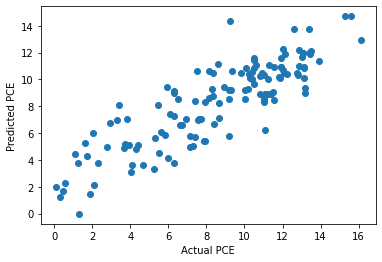

In [14]:
plt.scatter(df['PCE_max(%)'], y = df.preds)
plt.xlabel("Actual PCE")
plt.ylabel("Predicted PCE")

In [15]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=28),
                   xaxis= dict(title= 'Reported PCE (%)',zeroline= False, gridwidth= 2, dtick=2),
                   yaxis= dict(title= 'Predicted PCE (%)',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=800,
                   showlegend= True                 
)

fit  = np.linspace(min(df['PCE_max(%)']), max(df['PCE_max(%)']))
trace0 = go.Scatter(x = df['PCE_max(%)'], y = df.preds, mode = 'markers', marker= dict(size= 12, color= 'blue'),name='Testing Data')
# trace1 = go.Scatter(x = test_outputs ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'red'), 
#                     error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

data = [trace0,trace2]
fig= go.Figure(data, layout=layout0)
iplot(fig)
